In [ ]:
!git clone https://github.com/SHiveSH0708/image_captioning.git

Cloning into 'image_captioning'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.


In [ ]:
cd image_captioning

/content/image_captioning


In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 20.59 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi


/content/image_captioning/cocoapi


In [ ]:
cd PythonAPI

/content/image_captioning/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/image_captioning/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/

In [ ]:
cd ..

/content/image_captioning/cocoapi


In [ ]:
import torch

In [ ]:
!mkdir images

In [ ]:
cd images

/content/image_captioning/cocoapi/images


In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2021-11-01 06:18:39--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.198.193
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.198.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  16.0MB/s    in 13m 25s 

2021-11-01 06:32:05 (16.0 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2021-11-01 06:32:05--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.97.123
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.97.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  16.2MB/s    in 6m 56s  

2021-11-01 06:39:01 (15.2 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!wget http://images.cocodataset.org/zips/test2014.zip

--2021-11-01 06:39:01--  http://images.cocodataset.org/zips/test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.203.241
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.203.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6660437059 (6.2G) [application/zip]
Saving to: ‘test2014.zip’

test2014.zip        100%[===================>]   6.20G  16.3MB/s    in 6m 40s  

2021-11-01 06:45:42 (15.9 MB/s) - ‘test2014.zip’ saved [6660437059/6660437059]



In [ ]:
cd ..

/content/image_captioning/cocoapi


In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2021-11-01 06:45:42--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.93.35
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.93.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  15.4MB/s    in 17s     

2021-11-01 06:46:00 (14.0 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [ ]:
!wget http://images.cocodataset.org/annotations/image_info_test2014.zip

--2021-11-01 06:46:00--  http://images.cocodataset.org/annotations/image_info_test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.130.209
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.130.209|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763464 (746K) [application/zip]
Saving to: ‘image_info_test2014.zip’

image_info_test2014 100%[===================>] 745.57K   820KB/s    in 0.9s    

2021-11-01 06:46:02 (820 KB/s) - ‘image_info_test2014.zip’ saved [763464/763464]



In [ ]:
!unzip "/content/image_captioning/cocoapi/annotations_trainval2014.zip"

Archive:  /content/image_captioning/cocoapi/annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [ ]:
!unzip "/content/image_captioning/cocoapi/image_info_test2014.zip"

Archive:  /content/image_captioning/cocoapi/image_info_test2014.zip
  inflating: annotations/image_info_test2014.json  


In [ ]:
cd images

/content/image_captioning/cocoapi/images


In [ ]:
!unzip -q "/content/image_captioning/cocoapi/images/test2014.zip"

In [ ]:
!unzip -q "/content/image_captioning/cocoapi/images/train2014.zip"

In [ ]:
!unzip -q "/content/image_captioning/cocoapi/images/val2014.zip"

In [ ]:
pwd

'/content/image_captioning/cocoapi/images'

In [ ]:
cd ..

/content/image_captioning/cocoapi


In [ ]:
cd ..

/content/image_captioning


In [ ]:
import os
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '.'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'cocoapi/annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'cocoapi/annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=9.21s)
creating index...
index created!
loading annotations into memory...
Done (t=0.93s)
creating index...
index created!


http://images.cocodataset.org/val2014/COCO_val2014_000000350930.jpg


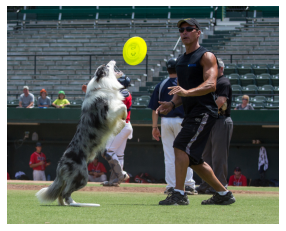

A dog is catching a Frisbee in its mouth.
A dog and a man with a Frisbee on a field.
The black, white, and grey dog is jumping to catch a yellow Frisbee.
a man and his dog playing with a yellow Frisbee 
A dog catching a frisbee on a baseball field while its owner watches.


In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [ ]:
# Watch for any changes in vocabulary.py, data_loader.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import torch
from data_loader import get_loader
from torchvision import transforms

# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)

loading annotations into memory...
Done (t=1.91s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.77s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:50<00:00, 8148.97it/s]


In [ ]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'

In [ ]:
import nltk

sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']


In [ ]:
sample_caption = []

start_word = data_loader.dataset.vocab.start_word
print('Special start word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

Special start word: <start>
[0]


In [ ]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 754, 3, 396, 39, 3, 1009, 207, 139, 3, 753, 18]


In [ ]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 98, 754, 3, 396, 39, 3, 1009, 207, 139, 3, 753, 18, 1]


In [ ]:
sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  754,    3,  396,   39,    3, 1009,  207,  139,    3,
         753,   18,    1])


In [ ]:
# Preview the word2idx dictionary.
print (dict(list(data_loader.dataset.vocab.word2idx.items())[:10]))

# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

{'<start>': 0, '<end>': 1, '<unk>': 2, 'a': 3, 'very': 4, 'clean': 5, 'and': 6, 'well': 7, 'decorated': 8, 'empty': 9}
Total number of tokens in vocabulary: 8855


In [ ]:
# Minimum word count threshold.
vocab_threshold = 5

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False)
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.71s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:51<00:00, 8006.66it/s]


Total number of tokens in vocabulary: 8855


In [ ]:
unk_word = data_loader.dataset.vocab.unk_word
print('Special unknown word:', unk_word)

print('All unknown words are mapped to this integer:', data_loader.dataset.vocab(unk_word))
print ("For example:")
print("'jfkafejw' is mapped to", data_loader.dataset.vocab('jfkafejw'))

Special unknown word: <unk>
All unknown words are mapped to this integer: 2
For example:
'jfkafejw' is mapped to 2


In [ ]:
# Obtain the data loader (from file). Note that it runs much faster than before!
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_from_file=True)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.94s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:51<00:00, 7992.32it/s]


In [ ]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86334
value: 11 --- count: 79948
value:  9 --- count: 71934
value: 12 --- count: 57637
value: 13 --- count: 37645
value: 14 --- count: 22335
value:  8 --- count: 20771
value: 15 --- count: 12841
value: 16 --- count:  7729
value: 17 --- count:  4842
value: 18 --- count:  3104
value: 19 --- count:  2014
value:  7 --- count:  1597
value: 20 --- count:  1451
value: 21 --- count:   999
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   383
value: 25 --- count:   277
value: 26 --- count:   215
value: 27 --- count:   159
value: 28 --- count:   115
value: 29 --- count:    86
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    39
value: 37 --- count:    32
value: 33 --- count:    31
value: 35 --- count:    31
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

In [ ]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_indices()
print('{} sampled indices: {}'.format(len(indices), indices))
# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
for batch in data_loader:
    images, captions = batch[0], batch[1]
    break
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

# Print the pre-processed images and captions.
#print('images:', images)
#print('captions:', captions)

10 sampled indices: [127196, 411384, 21424, 100765, 179747, 98790, 28596, 412409, 37448, 119911]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 11])


In [ ]:
# Import EncoderCNN and DecoderRNN. 
from model import EncoderCNN, DecoderRNN

In [ ]:
# Specify the dimensionality of the image embedding.
embed_size = 256

# Initialize the encoder. (We can add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
if torch.cuda.is_available():
    encoder = encoder.cuda()
    
# Move the last batch of images from Step 2 to GPU if CUDA is available
if torch.cuda.is_available():
    images = images.cuda()
# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that our encoder satisfies some requirements of the project!
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])


In [ ]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
# Move the decoder to GPU if CUDA is available.
if torch.cuda.is_available():
    decoder = decoder.cuda()
    
# Move the last batch of captions (from Step 1) to GPU if cuda is availble 
if torch.cuda.is_available():
    captions = captions.cuda()
# Pass the encoder output and captions through the decoder
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

# Check that our decoder satisfies some requirements of the project!
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "The shape of the decoder output is incorrect."

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 11, 8855])


In [ ]:
# Watch for any changes in vocabulary.py, data_loader.py, utils.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
import sys
from pycocotools.coco import COCO
import math
import torch.utils.data as data
import numpy as np
import os
import requests
import time

from utils import train, validate, save_epoch, early_stopping
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN

# Set values for the training variables
batch_size = 32         # batch size
vocab_threshold = 5     # minimum word count threshold
vocab_from_file = True  # if True, load existing vocab file
embed_size = 256        # dimensionality of image and word embeddings
hidden_size = 512       # number of features in hidden state of the RNN decoder
num_epochs = 3          # number of training epochs

In [ ]:
# Define a transform to pre-process the training images
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Define a transform to pre-process the validation images
transform_val = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.CenterCrop(224),                      # get 224x224 crop from the center
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

In [ ]:
# Build data loader, applying the transforms
train_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)
val_loader = get_loader(transform=transform_val,
                         mode='val',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)


# The size of the vocabulary
vocab_size = len(train_loader.dataset.vocab)

# Initialize the encoder and decoder
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available
if torch.cuda.is_available():
    encoder.cuda()
    decoder.cuda()

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:51<00:00, 7985.27it/s]


Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 202654/202654 [00:25<00:00, 8004.21it/s]


In [ ]:
# Define the loss function
criterion = nn.HingeEmbeddingLoss().cuda() if torch.cuda.is_available() else nn.HingeEmbeddingLoss()

# Specify the learnable parameters of the model
params = list(decoder.parameters()) + list(encoder.embed.parameters()) + list(encoder.bn.parameters())

# Define the optimizer
optimizer = torch.optim.Adam(params=params, lr=0.01)

In [ ]:
# Set the total number of training and validation steps per epoch
total_train_step = math.ceil(len(train_loader.dataset.caption_lengths) / train_loader.batch_sampler.batch_size)
total_val_step = math.ceil(len(val_loader.dataset.caption_lengths) / val_loader.batch_sampler.batch_size)
print ("Number of training steps:", total_train_step)
print ("Number of validation steps:", total_val_step)

Number of training steps: 12942
Number of validation steps: 6333


In [ ]:
!pwd

/content/image_captioning


In [ ]:
!mkdir ./models

In [ ]:
import gc
gc.collect()

250

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# Keep track of train and validation losses and validation Bleu-4 scores by epoch
train_losses = []
val_losses = []
val_bleus = []
# Keep track of the current best validation Bleu score
best_val_bleu = float("-INF")

start_time = time.time()
for epoch in range(1, num_epochs + 1):
    train_loss = train(train_loader, encoder, decoder, criterion, optimizer, 
                       vocab_size, epoch, total_train_step)
    train_losses.append(train_loss)
    val_loss, val_bleu = validate(val_loader, encoder, decoder, criterion,
                                  train_loader.dataset.vocab, epoch, total_val_step)
    val_losses.append(val_loss)
    val_bleus.append(val_bleu)
    if val_bleu > best_val_bleu:
        print ("Validation Bleu-4 improved from {:0.4f} to {:0.4f}, saving model to best-model.pkl".
               format(best_val_bleu, val_bleu))
        best_val_bleu = val_bleu
        filename = os.path.join("./models", "best-model.pkl")
        save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
                   val_bleu, val_bleus, epoch)
    else:
        print ("Validation Bleu-4 did not improve, saving model to model-{}.pkl".format(epoch))
    # Save the entire model anyway, regardless of being the best model so far or not
    filename = os.path.join("./models", "model-{}.pkl".format(epoch))
    save_epoch(filename, encoder, decoder, optimizer, train_losses, val_losses, 
               val_bleu, val_bleus, epoch)
    print ("Epoch [%d/%d] took %ds" % (epoch, num_epochs, time.time() - start_time))
    if epoch > 5:
        # Stop if the validation Bleu doesn't improve for 3 epochs
        if early_stopping(val_bleus, 3):
            break
    start_time = time.time()

RuntimeError: ignored

In [ ]:
# # Load the last checkpoints
# checkpoint = torch.load(os.path.join('./models', 'model-1.pkl'))

# # Load the pre-trained weights
# encoder.load_state_dict(checkpoint['encoder'])
# decoder.load_state_dict(checkpoint['decoder'])
# optimizer.load_state_dict(checkpoint['optimizer'])

# # Load start_loss from checkpoint if in the middle of training process; otherwise, comment it out
# start_loss = checkpoint['total_loss']
# # Reset start_loss to 0.0 if starting a new epoch; otherwise comment it out
# #start_loss = 0.0

# # Load epoch. Add 1 if we start a new epoch
# epoch = checkpoint['epoch']
# # Load start_step from checkpoint if in the middle of training process; otherwise, comment it out
# start_step = checkpoint['train_step'] + 1
# # Reset start_step to 1 if starting a new epoch; otherwise comment it out
# #start_step = 1

# # Train 1 epoch at a time due to very long training time
# train_loss = train(train_loader, encoder, decoder, criterion, optimizer, 
#                    vocab_size, epoch, total_train_step, start_step, start_loss)